In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from pathlib import Path
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
from torchvision.datasets import ImageFolder

from config import *
from torch_datasets import tfms
from utils import show_batch, sorted_files, show_img

Files already downloaded and verified


In [6]:
!ls sketch_data/256x256/photo

tx_000000000000 tx_000100000000


In [44]:
class Sketch2PixDS(Dataset):
    
    def __init__(self, path, type_):
        """
        Parameters
        -----------
        type_: str
            'photo' or 'sketch'
        """
        if type_ == 'photo':
            file_type = '.jpg'
        elif type == 'sketch':
            file_type = '.png'
        self.paths = list(path.rglob(f'*{file_type}'))
    
    def __getitem__(self, i):
        path = self.paths[i]
        return str(path).split('/')[-2]
    
    def __len__(self):
        pass

In [11]:
path = Path('sketch_data/256x256/')
list(path.iterdir())

[PosixPath('sketch_data/256x256/.DS_Store'),
 PosixPath('sketch_data/256x256/photo'),
 PosixPath('sketch_data/256x256/sketch')]

In [30]:
photo_path = path/'photo/tx_000100000000/elephant'

In [32]:
sketch_path = path/'sketch/tx_000000000110/elephant'

In [45]:
photo_ds = Sketch2PixDS(photo_path, 'photo')

In [46]:
photo_ds[25]

'elephant'

In [87]:
shoe_ds = ImageFolder('edges2shoes', transform=tfms)
shoe_dl = DataLoader(shoe_ds, bs, shuffle=True, num_workers=workers)

In [95]:
files = [str(f) for f in Path('edges2shoes/train').iterdir()]

In [100]:
files2 = [str(f) for f in Path('edges2shoes/val').iterdir()]

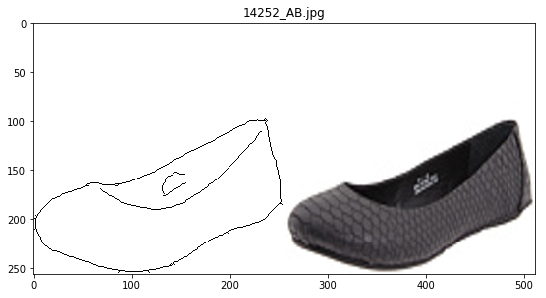

In [108]:
show_img(files[0])

In [187]:
batch = next(iter(shoe_dl))
batch[0].shape

torch.Size([64, 3, 64, 128])

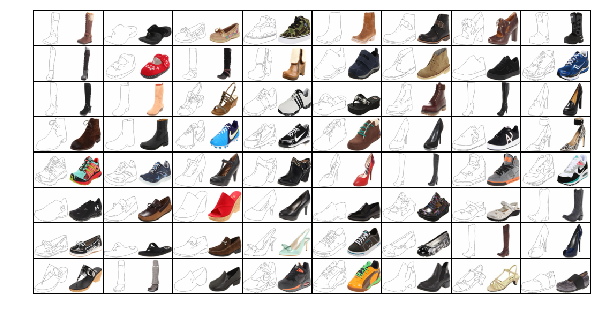

In [204]:
show_batch(shoe_dl)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


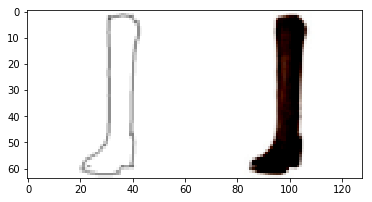

In [203]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(np.moveaxis(batch[0][0].numpy(), 0, 2))
plt.show()

In [188]:
batch[1].shape

torch.Size([64])

In [192]:
batch[1].float().mean()

tensor(0.0312)

In [54]:
class GRelu(nn.Module):
    """Generic ReLU."""
    
    def __init__(self, leak=0.0, max=float('inf'), sub=0.0):
        super().__init__()
        self.leak = leak
        self.max = max
        self.sub = sub
        
    def forward(self, x):
        """Check which operations are necessary to save computation."""
        x = F.leaky_relu(x, self.leak) if self.leak else F.relu(x)
        if self.sub:
            x -= self.sub
        if self.max:
            x = torch.clamp(x, max=self.max)
        return x
    
    def __repr__(self):
        return f'GReLU(leak={self.leak}, max={self.max}, sub={self.sub})'

In [55]:
JRelu = GRelu(leak=.1, sub=.4, max=6.0)

In [56]:
JRelu

GReLU(leak=0.1, max=6.0, sub=0.4)

In [57]:
gr = GRelu()

In [58]:
gr

GReLU(leak=0.0, max=inf, sub=0.0)

In [7]:
x = torch.randn(10000, 10000)*1.5
x

tensor([[-1.7622, -1.5283,  1.0733,  ..., -4.1463,  1.3158, -0.1394],
        [ 1.3102,  0.5818,  0.7842,  ..., -0.7559, -1.2583, -0.2745],
        [-0.1953, -0.8410,  1.5216,  ...,  1.9324,  1.3085, -0.7960],
        ...,
        [-0.0204, -1.5235, -1.1081,  ...,  0.8093,  1.9298,  0.7486],
        [-1.0593, -1.2324,  2.3774,  ..., -0.2231,  1.1648,  0.8327],
        [ 1.1468, -0.3820,  2.0590,  ..., -0.5271, -1.1870,  2.4502]])

In [30]:
def stats(x):
    """Quick wrapper to get mean and standard deviation of a tensor."""
    return round(x.mean().item(), 4), round(x.std().item(), 4)

In [29]:
stats(x)

(-0.0002, 1.4999)